In [1]:
## Price elasticity starter.
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
# load task dataset
price_sales = pd.read_csv("https://raw.githubusercontent.com/multidis/hult-retail-analytics/main/price_elasticity/price_sales_weekly.csv")
price_sales

,Date,Q_P1,Q_P2,Q_P3,Q_P4,Q_P5,Q_P6,Q_P7,Q_P8,price_P1,price_P2,price_P3,price_P4,price_P5,price_P6,price_P7,price_P8
0,2016-09-25,10435.81,8240.77,7428.31,4736.72,10998.13,31407.24,6150.97,13779.88,2.11,5.17,2.41,4.03,5.81,3.74,4.05,2.09
1,2016-10-02,9329.90,7104.73,7436.82,4525.64,10781.69,31590.56,6503.62,12731.18,2.16,5.33,2.43,4.02,5.78,3.74,4.01,2.08
2,2016-10-09,8113.71,6554.08,6967.51,4434.44,10535.43,30377.80,7448.76,14182.61,2.17,5.39,2.43,4.01,5.78,3.73,3.73,1.95
3,2016-10-16,8545.75,6901.22,6927.91,4477.84,10685.84,31116.45,7643.16,14924.92,2.14,5.32,2.44,4.02,5.71,3.74,3.66,2.02
4,2016-10-23,8200.70,6624.80,6757.23,4371.58,11670.29,30447.26,6824.46,14573.77,2.16,5.37,2.45,3.98,5.51,3.75,3.75,2.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2019-08-18,4537.20,958.50,20106.24,11194.89,14982.45,4927.63,1396.94,14757.72,2.19,6.73,2.41,4.20,5.88,6.70,4.29,2.42
152,2019-08-25,4678.89,2039.55,19446.23,10360.86,14249.49,4552.42,2367.29,15713.77,2.20,5.98,2.42,4.21,5.90,6.80,4.26,2.26
153,2019-09-01,4822.03,2535.14,18646.81,9809.78,14218.43,4280.80,2591.89,14082.42,2.21,5.95,2.42,4.22,5.75,6.62,4.22,2.31
154,2019-09-08,4385.12,2579.15,19283.60,10227.36,16528.17,4333.30,2691.12,12464.48,2.23,5.94,2.41,4.21,5.35,6.72,4.21,2.60


In [3]:
# load product cost information
cost = pd.read_csv("https://raw.githubusercontent.com/multidis/hult-retail-analytics/main/price_elasticity/product_cost.csv")
cost

,product,cost
0,P1,1.3
1,P2,3.9
2,P3,1.8
3,P4,2.9
4,P5,3.8
5,P6,3.2
6,P7,2.5
7,P8,1.5


In [4]:
# example selected product
prod = 1 # "P1"

In [5]:
linear_regressor = LinearRegression()
P = price_sales["price_P" + str(prod)].values.reshape(-1, 1)
Q = price_sales["Q_P" + str(prod)].values.reshape(-1, 1)
linear_regressor.fit(P, Q)

LinearRegression()

In [6]:
C1 = linear_regressor.intercept_[0]
C1

29390.678832754355

In [7]:
C2 = -linear_regressor.coef_[0][0]
C2

9809.965848900474

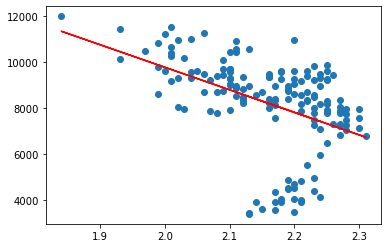

In [8]:
# visualize linear fit
Qfit = linear_regressor.predict(P)
plt.scatter(P, Q)
plt.plot(P, Qfit, color='red')
plt.show()

In [9]:
Pav = price_sales["price_P" + str(prod)].mean()
Pav

2.158974358974359

In [10]:
Qav = price_sales["Q_P" + str(prod)].mean()
Qav

8211.214102564101

In [11]:
# estimate price elasticity
Elast = -C2 * Pav / Qav
Elast

-2.5793341235100153

In [12]:
# CAUTION Python indices start with 0, not 1
C = cost.iloc[prod-1]['cost']
C

1.3

In [13]:
# find optimal price
Popt = (C1 + C2*C) / (2*C2)
Popt

2.148001077957297